<a href="https://colab.research.google.com/github/Nakulpradeep94/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

# **Importing library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score

import lightgbm

import warnings
warnings.filterwarnings('ignore')


# **Mounting drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ALMABETTER/Coronavirus Tweet Sentiment Analysis/Copy of Coronavirus Tweets.csv', encoding='latin-1')

# Basic Data Analysis

In [4]:
#Top 5 rows of the dataset
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
#last 5 rows of the dataset
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [6]:
#to find columns of the dataset
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [7]:
#to find the number of rows and columns
df.shape

(41157, 6)

In [10]:
# To find the unique values in sentiment column
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [12]:
df['Location'].nunique()

12220

In [13]:
#checking the dates of tweeting
df['TweetAt'].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [14]:
#to get the number of unique values of date
df['TweetAt'].nunique()

30

So the tweets are from 16Th March 2020 to 14th April 2020. i.e for a period of 30 days

In [8]:
#to get infornation about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


We can see that there are null values present in the location  column as there are only 32567 non values for location with rowsof 41157 values.

# Null Value and Duplicate value

In [16]:
#Checking null value count of each column
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

There are 8590 null values in location column

In [20]:
percentage_null=df['Location'].isnull().sum()*100/len(df)
print("The percentage of null values of location  column is :",percentage_null)

The percentage of null values of location  column is : 20.87129771363316


In [26]:
# checking for duplicate values
df[df.duplicated()].shape

(0, 6)

In [29]:
# checking for duplicate values
len(df[df.duplicated()])

0

We can see from above that there are no duplicate rows for the given dataset

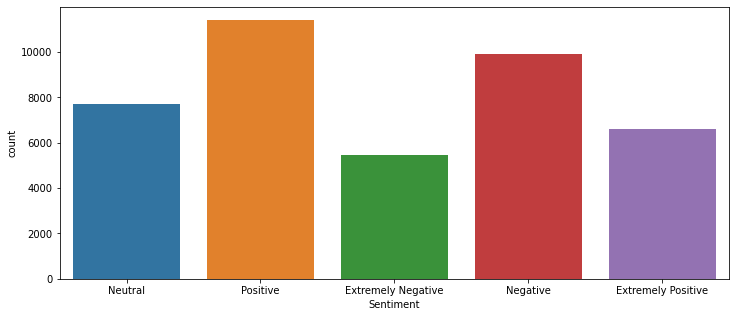

In [34]:
# to get visualisation of the number of different types of sentiment
plt.figure(figsize=[12,5])
sns.countplot(df['Sentiment'])

We can see that the majority sentiment from the tweets are Positive